# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [623]:
# Add Matplotlib inline magic command
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [624]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [625]:
#  1. Get the total rides for each city type
rides_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_city_type



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [626]:
drivers_for_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_for_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [627]:
#  1. Get the total rides for each city type
rides_city_type = pyber_data_df.groupby(["type"]).sum()["ride_id"]
rides_city_typedrivers_city_type

NameError: name 'rides_city_typedrivers_city_type' is not defined

In [628]:
# 2. Get the total drivers for each city type

# Creat a data frame for each city type
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# group by city and calculate drivers city average
urban_driver_average = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_average = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_average = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# Create dataframes for each city type adding a column with the city type
rural_driver_average_complete = pd.DataFrame(rural_driver_average)
rural_driver_average_complete=rural_driver_average_complete.assign(type="Rural")
urban_driver_average_complete = pd.DataFrame(urban_driver_average)
urban_driver_average_complete=urban_driver_average_complete.assign(type="Urban")
suburban_driver_average_complete = pd.DataFrame(suburban_driver_average)
suburban_driver_average_complete=suburban_driver_average_complete.assign(type="Suburban")
#Concatenate the 3 dataframes vertcally 
vertical_stack = pd.concat([rural_driver_average_complete, urban_driver_average_complete, suburban_driver_average_complete], axis=0)

#Get the total drivers for each city type

drivers_city_type = vertical_stack.groupby(["type"]).sum()["driver_count"]

drivers_city_type

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [629]:
#  3. Get the total amount of fares for each city type
drivers_city_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [630]:
#  4. Get the average fare per ride for each city type. 
fare_per_ride=fares_city_type/rides_city_type
fare_per_ride

type
Rural       7.449512e-12
Suburban    6.230141e-12
Urban       5.032492e-12
dtype: float64

In [631]:
# 5. Get the average fare per driver for each city type. In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.

Average_fare_per_driver = fares_city_type/drivers_city_type
Average_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [632]:
#  6. Create a PyBer summary DataFrame. pd.DataFrame({'r': r, 's': s})
pyber_summary_df = pd.DataFrame({"Total Rides":rides_city_type, "Total drivers":drivers_city_type, "Total fares":fares_city_type, "Average fare per raid":fare_per_ride, "Average fare per driver":Average_fare_per_driver})
pyber_summary_df

,Total Rides,Total drivers,Total fares,Average fare per raid,Average fare per driver
type,,,,,
Rural,580968240341287,537,4327.93,7.449512e-12,8.059460
Suburban,3106884522576766,8570,19356.33,6.230141e-12,2.258615
Urban,7919412664056093,59602,39854.38,5.032492e-12,0.668675


In [633]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [634]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total drivers"] = pyber_summary_df["Total drivers"].map("{:,.0f}".format)
pyber_summary_df["Total fares"] = pyber_summary_df["Total fares"].map("${:,.2f}".format)
pyber_summary_df["Average fare per raid"] = pyber_summary_df["Average fare per raid"].map("${:.2f}".format)
pyber_summary_df["Average fare per driver"] = pyber_summary_df["Average fare per driver"].map("${:.2f}".format)


pyber_summary_df

,Total Rides,Total drivers,Total fares,Average fare per raid,Average fare per driver
Rural,"580,968,240,341,287",537,"$4,327.93",$0.00,$8.06
Suburban,"3,106,884,522,576,766","8,570","$19,356.33",$0.00,$2.26
Urban,"7,919,412,664,056,093","59,602","$39,854.38",$0.00,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [635]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [636]:
pyber_data_df["new_date"]=pyber_data_df["date"].str[:10]

In [637]:
pyber_data_df["new_date"]=pyber_data_df["date"]

In [638]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date
new_pyber = pyber_data_df.groupby(["type","new_date"]).sum()["fare"]
new_pyber_df = pd.DataFrame(new_pyber)
new_pyber_df


fare
type  new_date                  
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [639]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_pyber_df = new_pyber_df.reset_index()
new_pyber_df

,type,new_date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [640]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pyber_df_table = new_pyber_df.pivot(index="new_date",columns="type",values ="fare")

new_pyber_df_table

type,Rural,Suburban,Urban
new_date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [641]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_pyber_df_table= new_pyber_df_table.loc["2019-01-01" : "2019-04-29"]
new_pyber_df_table


type,Rural,Suburban,Urban
new_date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [642]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pyber_df_table.index = pd.to_datetime(new_pyber_df_table.index)

In [643]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pyber_df_table.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [644]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pyber_df_table = new_pyber_df_table.resample("W").sum()
new_pyber_df_table

type,Rural,Suburban,Urban
new_date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<IPython.core.display.Javascript object>


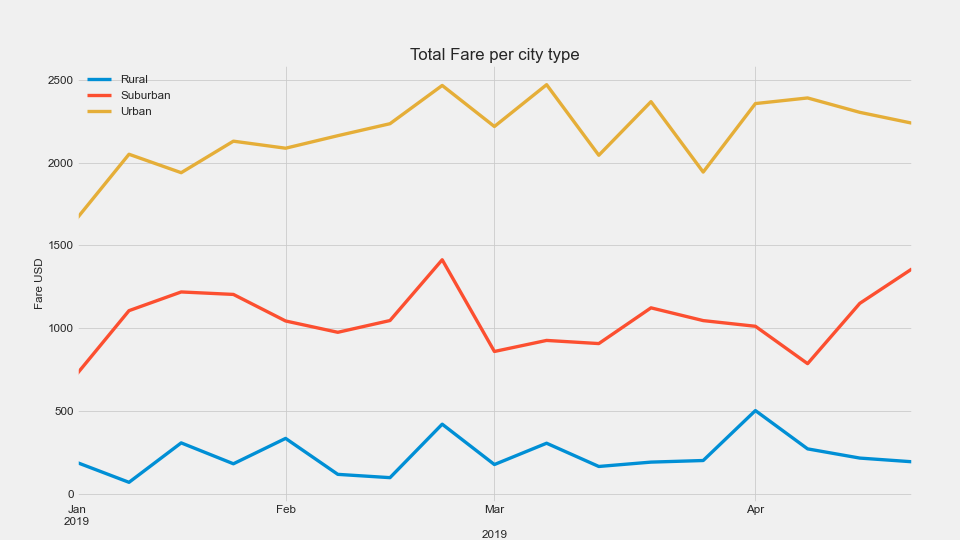

In [706]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



ax=new_pyber_df_table.plot(figsize=(16,9))



# Incorporate the other graph properties.
plt.title(f"Total Fare per city type")
ax.set_ylabel('Fare USD',fontsize=14)
ax.set_xlabel("2019",fontsize=14)

              
    



plt.legend(loc='best')

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
# Show plot.


plt.show()

<IPython.core.display.Javascript object>


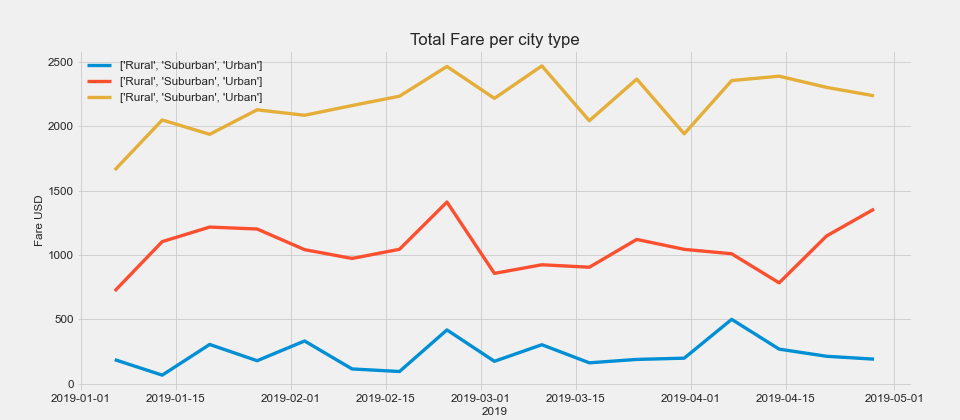

In [707]:
# 8b. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

types = ["Rural", "Suburban", "Urban"]

fig, ax = plt.subplots(figsize=(16,7))
ax.plot(new_pyber_df_table, label=types)



plt.title(f"Total Fare per city type")
ax.set_ylabel('Fare USD',fontsize=14)
ax.set_xlabel("2019",fontsize=14)



ax.legend(loc='best')






plt.legend(loc='best')

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary(b).png")
# Show plot.


plt.show()